<a href="https://colab.research.google.com/github/Wairioko/Credit-risk-analysis/blob/main/Credit-Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
import numpy as np


In [2]:
# load data
credit_risk_data = pd.read_csv('/content/credit_risk_dataset.csv')
credit_risk_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [3]:
# remove outlier such as entry with 128years in employment length
# calculate the IQR of person_emp_length
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # remove the outliers based on the IQR method
    return data[~((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR))]
    
# remove outliers using person_emp_length and person_age as points
credit_risk_data['person_emp_length'] = outliers(credit_risk_data['person_emp_length'])
credit_risk_data['person_age'] = outliers(credit_risk_data['person_age'])
credit_risk_data.dropna(how='any')
credit_risk_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31087.000000,3.258100e+04,30833.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,26.813009,6.607485e+04,4.430383,9589.371106,11.011695,0.218164,0.170203,5.804211
std,4.530914,6.198312e+04,3.444077,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,29.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,40.000000,6.000000e+06,14.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Text(0.5, 1.0, 'Loan amounts grouped by purpose')

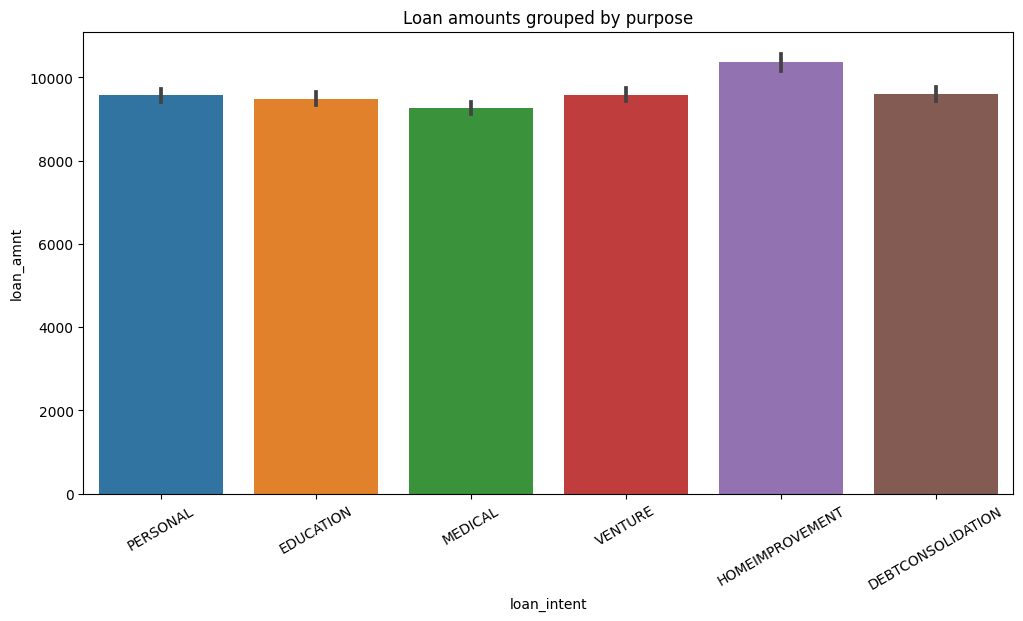

In [8]:
# Loan amounts grouped by purpose
plt.figure(figsize=(12,6))
sns.barplot(x='loan_intent', y='loan_amnt', data=credit_risk_data)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

Text(0.5, 1.0, 'Loan amounts grouped by homeownership')

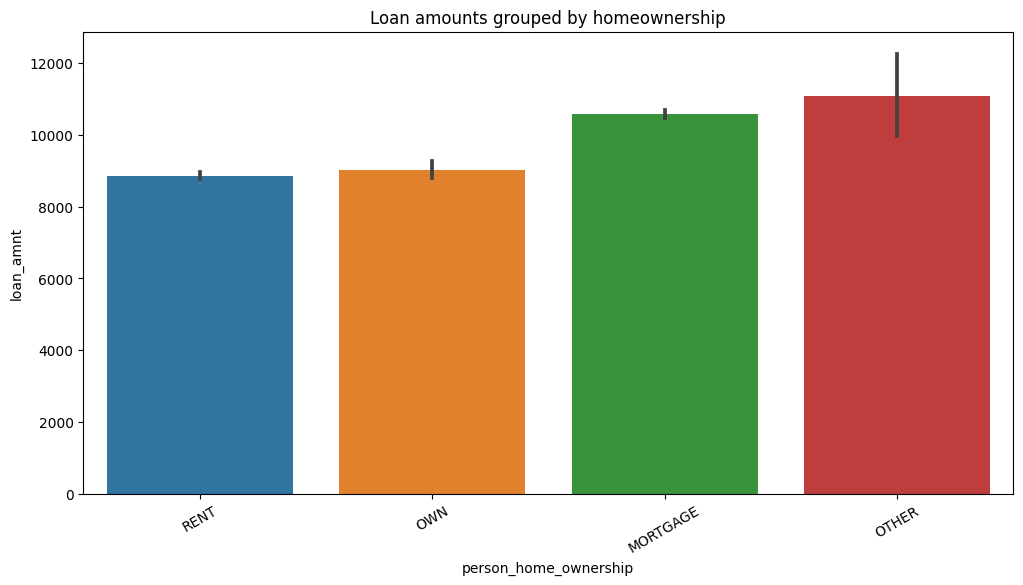

In [7]:
# Loan amounts grouped by purpose
plt.figure(figsize=(12,6))
sns.barplot(x='person_home_ownership', y='loan_amnt', data=credit_risk_data)
# sns.boxplot()
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by homeownership')

Text(0.5, 1.0, 'Loan amounts grouped by homeownership')

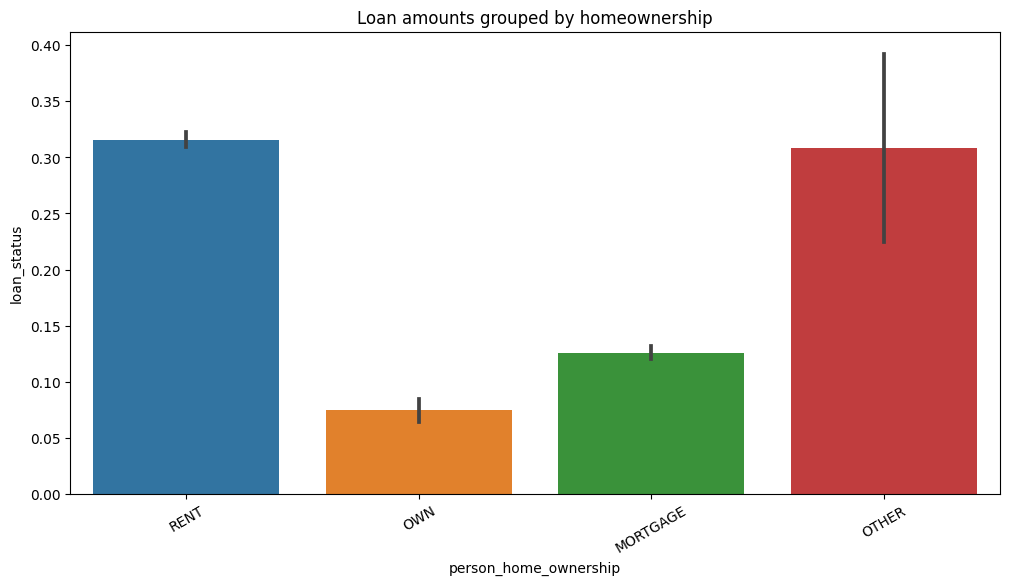

In [11]:
# Loan amounts grouped by purpose
plt.figure(figsize=(12,6))
sns.barplot(x='person_home_ownership', y='loan_status', data=credit_risk_data)
# sns.boxplot()
plt.xticks(rotation=30)
plt.title('Loan status grouped by homeownership')

Text(0.5, 1.0, 'Loan amounts grouped by homeownership')

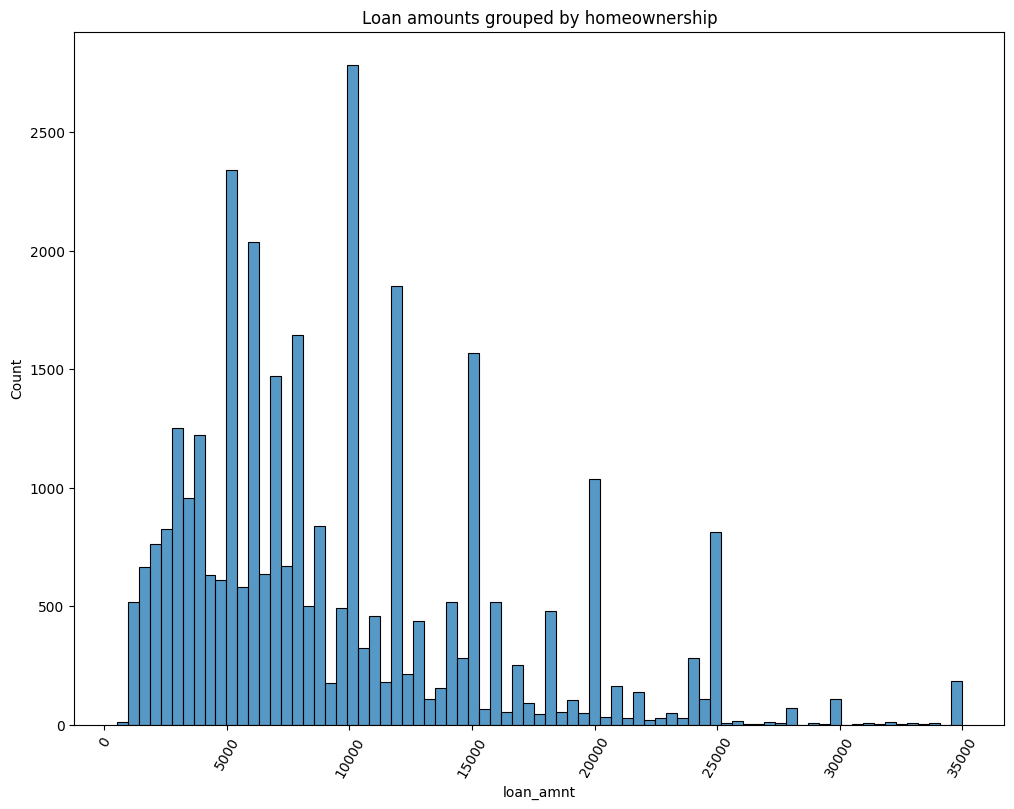

In [16]:
# loan amount distribution
plt.figure(figsize=(12,9))
sns.histplot(credit_risk_data, x='loan_amnt')
# sns.boxplot()
plt.xticks(rotation=60)
plt.title('Loan amounts grouped by homeownership')

We can see that majority of the loans lie under the 10,000 mark with the majority in the 5000-10000 range. 

<ipython-input-18-15c8bf886002>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'person_income','loan_intent','cb_person_cred_hist_length']].corr()
<ipython-input-18-15c8bf886002>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


                            loan_amnt  loan_int_rate  person_emp_length  \
loan_amnt                    1.000000       0.146813           0.112824   
loan_int_rate                0.146813       1.000000          -0.057949   
person_emp_length            0.112824      -0.057949           1.000000   
person_income                0.266820       0.000792           0.129610   
cb_person_cred_hist_length   0.041967       0.016696           0.043040   

                            person_income  cb_person_cred_hist_length  
loan_amnt                        0.266820                    0.041967  
loan_int_rate                    0.000792                    0.016696  
person_emp_length                0.129610                    0.043040  
person_income                    1.000000                    0.117987  
cb_person_cred_hist_length       0.117987                    1.000000  


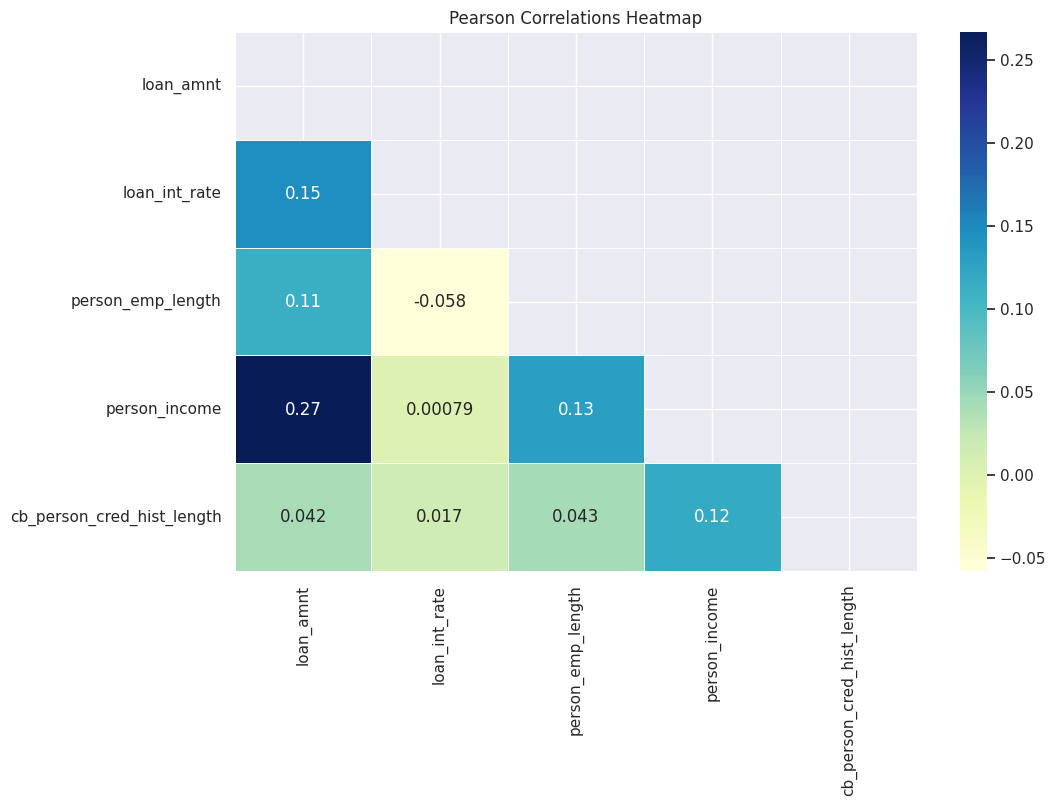

In [18]:
# correlation analysis
corr = credit_risk_data[['loan_amnt', 'loan_int_rate', 'loan_grade', 'person_emp_length', 'person_home_ownership', 
                         'person_income','loan_intent','cb_person_cred_hist_length']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

> Loan amount has a slight positive correlation with interest rate, employment length, and person income, but a very weak positive relationship with credit history length.


> Interest rate has a weak negative correlation with employment length and almost no relationship with income or credit history length.
Employment length has a weak positive correlation with income and a very weak positive relationship with credit history length.




> Income has a weak positive correlation with credit history length. These correlations provide insights into the variables' associations, but they only represent linear relationships and not causation.

In [ ]:
# now lets start with demographic analysis of our data
# age income analysis,age loan intent, age loan amount, age and default rate
# age range from 21 to 42 years
# 3 buckets 20-25, 26-30, 31 and above

def data_by_age_range(data, age_range, cols=['person_income']):
    '''
    Return a pandas DataFrame containing the specified columns for the rows where `person_age` is within the specified `age_range`.

    Args:
        data (pandas.DataFrame): The input DataFrame.
        age_range (tuple): A tuple containing the inclusive lower age and exclusive upper age.
        cols (list): A list of column names to include in the output DataFrame. Default is ['person_income'].

    Returns:
        A pandas DataFrame containing the specified columns for the specified age range.
    '''
    mask = (data['person_age'] >= age_range[0]) & (data['person_age'] < age_range[1])
    return data.loc[mask, cols]    

data_bucket1 = data_by_age_range(credit_risk_data, (20, 25),
                                 cols=['person_income', 'loan_grade', 'loan_amnt', 'cb_person_default_on_file', 'loan_intent', 'person_home_ownership'])
data_bucket2 = data_by_age_range(credit_risk_data, (25, 30),
                                 cols=['person_income', 'loan_grade', "loan_amnt", 'cb_person_default_on_file', 'loan_intent', 'person_home_ownership'])
data_bucket3 = data_by_age_range(credit_risk_data, (31, 42),
                                 cols=['person_income', 'loan_grade', "loan_amnt", 'cb_person_default_on_file', 'loan_intent', 'person_home_ownership'])

income_bucket1 = data_bucket1['person_income'].agg('sum')
income_bucket2 = data_bucket2['person_income'].agg('sum')
income_bucket3 = data_bucket3['person_income'].agg('sum')

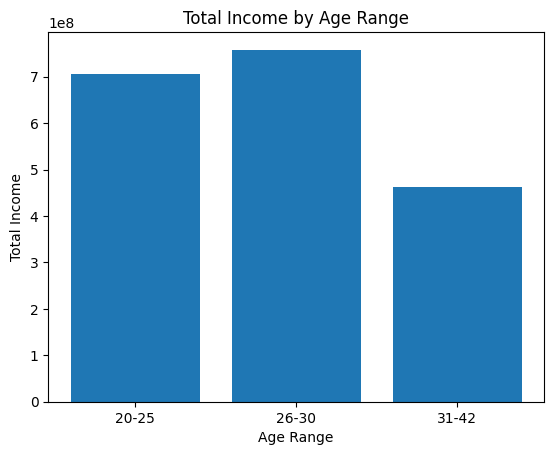

Total income for bucket1: 706482018
Total income for bucket2: 757923539
Total income for bucket3: 462141654


In [ ]:
# plot the income for different buckets
# create the income buckets
income_buckets = ['20-25', '26-30', '31-42']

# create the total income values for each bucket
income_values = [income_bucket1, income_bucket2, income_bucket3]

# plot the bar chart
plt.bar(income_buckets, income_values)

# add labels to the plot
plt.title('Total Income by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Total Income')

# display the plot
plt.show()
print("Total income for bucket1: {}".format(data_bucket1['person_income'].agg('sum')))
print("Total income for bucket2: {}".format(data_bucket2['person_income'].agg('sum')))
print("Total income for bucket3: {}".format(data_bucket3['person_income'].agg('sum')))

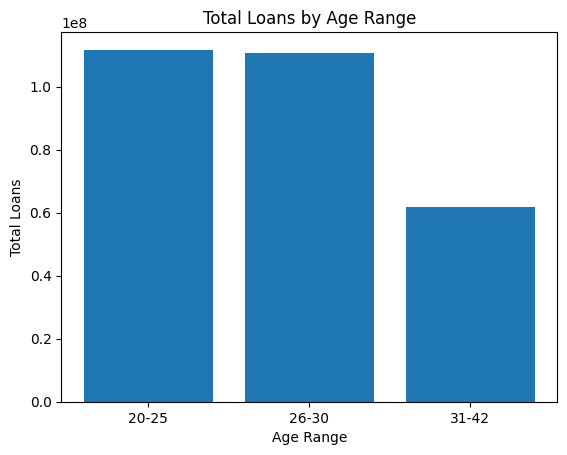

Total loans for bucket1: 111681950
Total loans for bucket2: 110655525
Total loans for bucket3: 61781800


In [ ]:
# loan amount by bucket
# create the income buckets

loans_bucket1 = data_bucket1['loan_amnt'].agg('sum')
loans_bucket2 = data_bucket2['loan_amnt'].agg('sum')
loans_bucket3 = data_bucket3['loan_amnt'].agg('sum')
loans_buckets = ['20-25', '26-30', '31-42']

# create the total income values for each bucket
loans_values = [loans_bucket1, loans_bucket2, loans_bucket3]

# plot the bar chart
plt.bar(loans_buckets, loans_values)

# add labels to the plot
plt.title('Total Loans by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Total Loans')

# display the plot
plt.show()
print("Total loans for bucket1: {}".format(loans_bucket1))
print("Total loans for bucket2: {}".format(loans_bucket2))
print("Total loans for bucket3: {}".format(loans_bucket3))


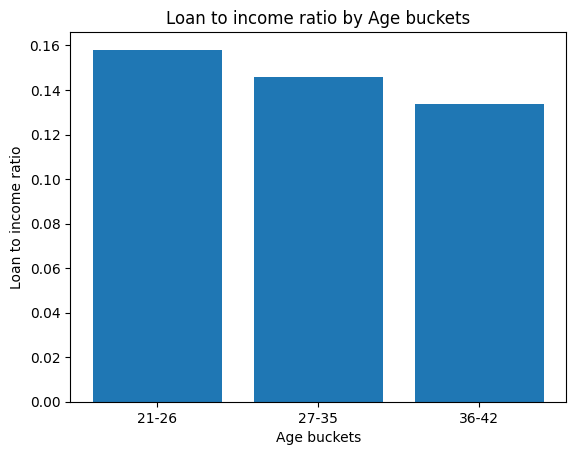

Loan to income ratio for bucket1: 0.158
Loan to income ratio for bucket2: 0.146
Loan to income ratio for bucket3: 0.134


In [ ]:
# loan to income ratio by age
bucket1_ratio = loans_bucket1 / income_bucket1
bucket2_ratio = loans_bucket2 / income_bucket2
bucket3_ratio = loans_bucket3 / income_bucket3

ratio_values = [bucket1_ratio, bucket2_ratio, bucket3_ratio]
ranges = ['21-26', '27-35', '36-42']

plt.bar(ranges, ratio_values)
# add labels to the plot
plt.title('Loan to income ratio by Age buckets')
plt.xlabel('Age buckets')
plt.ylabel('Loan to income ratio')
plt.show()

print("Loan to income ratio for bucket1: {}".format(round(bucket1_ratio, 3)))
print("Loan to income ratio for bucket2: {}".format(round(bucket2_ratio, 3)))
print("Loan to income ratio for bucket3: {}".format(round(bucket3_ratio, 3)))

In [ ]:
# accounts that have defaulted before per bucket and value of loans held by them
total_bucket1_defaults = data_bucket1[data_bucket1['cb_person_default_on_file'] == 'Y']['loan_amnt']
total_bucket2_defaults = data_bucket2[data_bucket2['cb_person_default_on_file'] == 'Y']['loan_amnt']
total_bucket3_defaults = data_bucket3[data_bucket3['cb_person_default_on_file'] == 'Y']['loan_amnt']

print("Percentage of loans with default history compared to bucket loan value: {}".format((round(len(total_bucket1_defaults)/len(data_bucket1), 4))*100, sum(total_bucket1_defaults)))
print("Percentage of loans with default history compared to total bucket loan value: {}".format((round(len(total_bucket2_defaults)/len(data_bucket2), 4))*100, sum(total_bucket2_defaults)))
print("Percentage of loans with default history to total bucket loan value: {}".format((round(len(total_bucket3_defaults)/len(data_bucket3), 4))*100, sum(total_bucket3_defaults)))
# now what percentage does the amount of these loans contribute to the total loans of that
print('***'*100)
default_hist_bucket1 = sum(total_bucket1_defaults) / loans_bucket1
default_hist_bucket2 = sum(total_bucket2_defaults) / loans_bucket2
default_hist_bucket3 = sum(total_bucket3_defaults) / loans_bucket3
# value comparison for this loans
print("Ratio of loans with default history to total bucket loan value: {}".format(round(default_hist_bucket1, 4)))
print("Ratio of loans with default history to total bucket loan value: {}".format(round(default_hist_bucket2, 4)))
print("Ratio of loans with default history to total bucket loan value: {}".format(round(default_hist_bucket3, 4)))

Percentage of loans with default history compared to bucket loan value: 17.299999999999997
Percentage of loans with default history compared to total bucket loan value: 17.580000000000002
Percentage of loans with default history to total bucket loan value: 18.029999999999998
************************************************************************************************************************************************************************************************************************************************************************************************************
Ratio of loans with default history to total bucket loan value: 0.1808
Ratio of loans with default history to total bucket loan value: 0.1851
Ratio of loans with default history to total bucket loan value: 0.1922


The value of loans of people with default history only account for 0.181, 0.185 and 0.192 respectively. Which is relatively safe although more data might be required in regards to payment histories for each person to get better insight into these numbers. The third bucket also has the largest number of people with default and this steadily from bucket1 value of 17.3 to 17.6 in bucket2 to bucket3's 18.03%. This is expected as by age 36-42 majority have had loans and therefore more default probabilities.

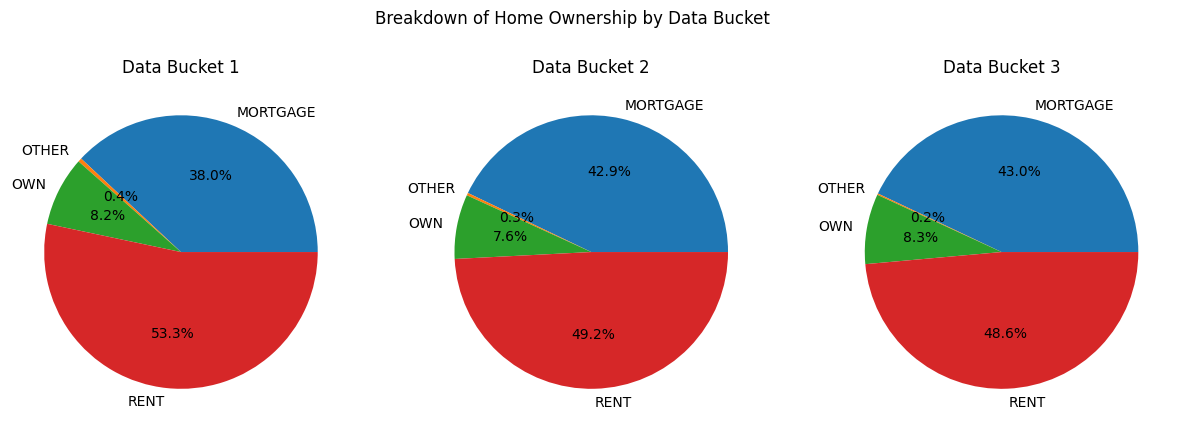

In [ ]:
# getting home ownership stats; 
home_ownership_bucket1 = data_bucket1.groupby('person_home_ownership').size()
home_ownership_bucket2 = data_bucket2.groupby('person_home_ownership').size()
home_ownership_bucket3 = data_bucket3.groupby('person_home_ownership').size()

# Plot home ownership breakdown as three separate pie charts
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].pie(home_ownership_bucket1, labels=home_ownership_bucket1.index, autopct='%1.1f%%')
axs[0].set_title('Data Bucket 1')

axs[1].pie(home_ownership_bucket2, labels=home_ownership_bucket2.index, autopct='%1.1f%%')
axs[1].set_title('Data Bucket 2')

axs[2].pie(home_ownership_bucket3, labels=home_ownership_bucket3.index, autopct='%1.1f%%')
axs[2].set_title('Data Bucket 3')

plt.suptitle('Breakdown of Home Ownership by Data Bucket')
plt.show()

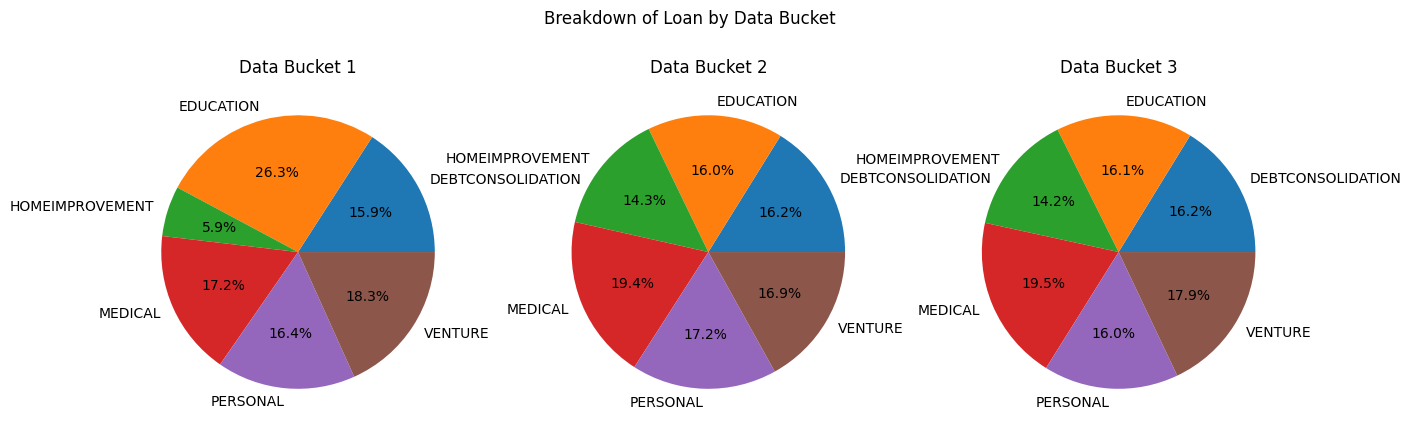

In [ ]:
# breakdown reasons for taking the loans
# getting loan intent stats; 
loan_intent_bucket1 = data_bucket1.groupby('loan_intent').size()
loan_intent_bucket2 = data_bucket2.groupby('loan_intent').size()
loan_intent_bucket3 = data_bucket3.groupby('loan_intent').size()

# print(loan_intent_bucket1)
# print(loan_intent_bucket2)
# print(loan_intent_bucket3)
# Plot home ownership breakdown as three separate pie charts
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].pie(loan_intent_bucket1, labels=loan_intent_bucket1.index, autopct='%1.1f%%')
axs[0].set_title('Data Bucket 1')

axs[1].pie(loan_intent_bucket2, labels=loan_intent_bucket2.index, autopct='%1.1f%%')
axs[1].set_title('Data Bucket 2')

axs[2].pie(loan_intent_bucket3, labels=loan_intent_bucket3.index, autopct='%1.1f%%')
axs[2].set_title('Data Bucket 3') 

plt.suptitle('Breakdown of Loan by Data Bucket')
plt.show()

Now when we look at the 3 age buckets. We can see that education is the leading reason for loan acquisition more than 10% more than each of the other buckets.  This goes with the reasoning that our youngest customers are focused on building their careers and going back to school for post graduate education and professional courses or the completion of their undergraduate degrees.

 Another trend we can see is in the home improvement as reason for loan application. There's a gradual increase in the percentage of home improvement loan applications from the 21-26 age bucket to the 27-35 age bucket, which remains relatively consistent in the 35-42 age bucket. This could potentially be attributed to factors such as increased financial stability, homeownership, or the need for home renovations as individuals progress through different stages of life.


 The lower percentage in the 21-26 age group could be attributed to a higher dependency on parental health insurance coverage, which reduces the need for them to seek loans for medical expenses. In contrast, as individuals become financially independent in the older age groups, there is a higher proportion of loan applications for medical reasons. This suggests that the younger age group may have a lower demand for medical-related loans due to the dependency factor, while the older age groups exhibit a greater need for such financial assistance.

In [ ]:
# linear regression to show how well some of our independent vars predict 
# a person listed with a history of default
# remove outliers using person_emp_length and person_age as points
credit_risk_data['person_emp_length'] = outliers(credit_risk_data['person_emp_length'])
credit_risk_data['person_age'] = outliers(credit_risk_data['person_age'])
# convert 4 columns to numericals
credit_risk_data['person_home_ownership'] = credit_risk_data['person_home_ownership'].astype('category').cat.codes
credit_risk_data['loan_intent'] = credit_risk_data['loan_intent'].astype('category').cat.codes
credit_risk_data['loan_grade'] = credit_risk_data['loan_grade'].astype('category').cat.codes
credit_risk_data['cb_person_default_on_file'] = credit_risk_data['cb_person_default_on_file'].astype('category').cat.codes


In [ ]:
# call model
model = LinearRegression()
# set independent and dependent vars
X = credit_risk_data[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade',
                      'loan_int_rate', 'loan_amnt', 'cb_person_cred_hist_length']]

y = credit_risk_data['cb_person_default_on_file']


# now lets split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Replace NaN values with mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# fit model to training data
model.fit(X_train, y_train)
# predict y_test
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Logistic Regression mean squared error: {:.2f}".format(mse))



Logistic Regression mean squared error: 0.10


***person_age:*** A positive coefficient (1.718656e-03) indicates that an increase in age is associated with a slight increase in the likelihood of default, but the impact is relatively small.

***person_income:*** A positive coefficient (2.029915e-08) suggests that higher income is associated with a slightly higher likelihood of default, but again, the impact is small.

***person_home_ownership:*** A negative coefficient (-3.289500e-03) suggests that owning a home is associated with a slightly lower likelihood of default, but the impact is small.

***person_emp_length:*** A negative coefficient (-7.732293e-04) suggests that longer employment length is associated with a lower likelihood of default, and the impact is relatively larger than the previous coefficients.

***loan_intent:*** A negative coefficient (-8.981814e-04) suggests that certain loan intentions may be associated with a lower likelihood of default, but the impact is small.

***loan_grade:*** A positive coefficient (1.796348e-01) suggests that the lower rated loans are associated with a significantly higher likelihood of default, and this is the largest coefficient, indicating that loan grade is a significant predictor of default history.

***loan_int_rate:*** A negative coefficient (-6.991793e-04) suggests that lower interest rates are associated with a slightly lower likelihood of default, but the impact is small.

***loan_amnt:*** A negative coefficient (-2.351512e-06) suggests that higher loan amounts are associated with a slightly lower likelihood of default, but the impact is small.

***cb_person_cred_hist_length:*** A negative coefficient (-1.444362e-03) suggests that longer credit history is associated with a lower likelihood of default, and the impact is relatively larger than some of the previous coefficients.

Overall, these coefficients provide insight into the relative importance of each variable in predicting someone's default history. Loan grade appears to be the most important factor, while age and income seem to have relatively little impact. However, it's important to remember that these coefficients are only estimates and may vary depending on the specific dataset and model used.

In [ ]:
# create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8290537084398977
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      8037
           1       0.52      0.52      0.52      1738

    accuracy                           0.83      9775
   macro avg       0.71      0.71      0.71      9775
weighted avg       0.83      0.83      0.83      9775



The model has an overall accuracy of ***0.8290537084398977***, meaning that approximately ***83%*** of the predictions made by the model are correct.

The precision for the positive class (defaulters) is 0.52, indicating that 52% of the individuals predicted by the model to default actually defaulted.

The recall for the positive class is also 0.52, which suggests that the model correctly identified 52% of all individuals who defaulted.

The F1-score, which is the harmonic mean of precision and recall, is 0.52 for the positive class.

The classification report also shows a breakdown of performance metrics for each class (0 and 1), including precision, recall, and F1-score.

The precision and recall for the negative class (non-defaulters) are both 0.90, indicating that the model performs better at correctly identifying non-defaulters than defaulters.

Overall, the macro average of the F1-scores for both classes is 0.71, indicating that the model's performance is relatively balanced between both classes.

Finally, the weighted average of the F1-scores is 0.83, indicating that the model's performance is good overall, with slightly better performance on non-defaulters than defaulters.